In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

Wavelet Scale Analysis of DDO 69 in V and B filters:

Commencing the wavelet scale analysis of DD069_V
|████████████████████████████████████████| 100/100 [100%] in 1:21.4 (1.23/s) 
Wavelet scale analysis of DD069_V has finished.
Commencing the wavelet scale analysis of DD069_B
|████████████████████████████████████████| 100/100 [100%] in 1:17.2 (1.30/s) 
Wavelet scale analysis of DD069_B has finished.
The normal correlation between the maps is:  0.983388755621609


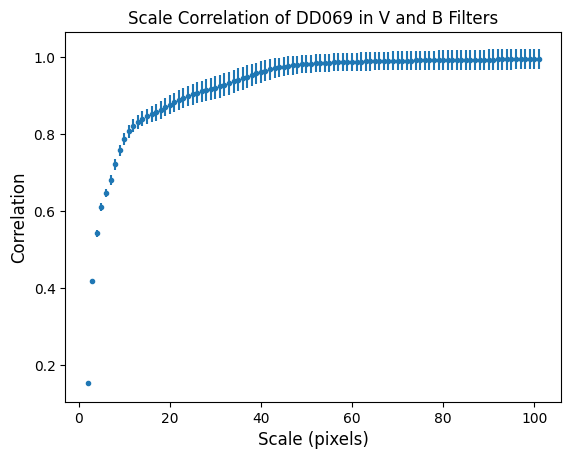

<Figure size 640x480 with 0 Axes>

In [3]:
scale_triplet = [2,100,1]

cube_V = pethat_wavelet_scale_analysis('DD069_V', 'starless_backgroundless_d69_V.fit', [[300,700],[200,600]], scales_in = scale_triplet, pixel_scale=1.134, distance=800000)
cube_B = pethat_wavelet_scale_analysis('DD069_B', 'starless_backgroundless_d69_B.fit', [[300,700],[200,600]],  scales_in = scale_triplet, pixel_scale=1.134, distance=800000)

plot_correlation(cube_V,cube_B,do_show=True)

The normal correlation between the maps is:  0.983388755621609


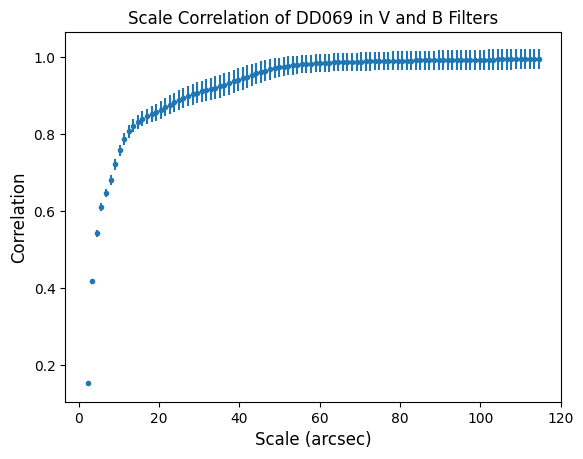

<Figure size 640x480 with 0 Axes>

In [11]:
plot_correlation(cube_V,cube_B,do_show=True,unit = 'arcsec')

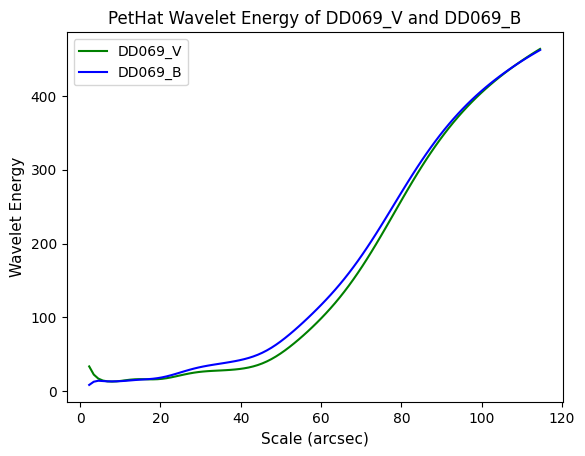

In [4]:
energy_V = cube_V.calc_energies(do_plot=False)
energy_B = cube_B.calc_energies(do_plot=False)
unit = 'arcsec'

plt.plot(cube_V.scales*cube_V.unit_conv(unit),energy_V,label=cube_V.name,color='green')
plt.plot(cube_B.scales*cube_B.unit_conv(unit),energy_B,label=cube_B.name,color='blue')
plt.xlabel(r'Scale ('+unit+')', fontsize=11)
plt.ylabel(r'Wavelet Energy', fontsize=11)
plt.legend()
plt.title('PetHat Wavelet Energy of '+cube_V.name+' and '+cube_B.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_V.name+'_and_'+cube_B.name+'.png', dpi=300)
plt.show()



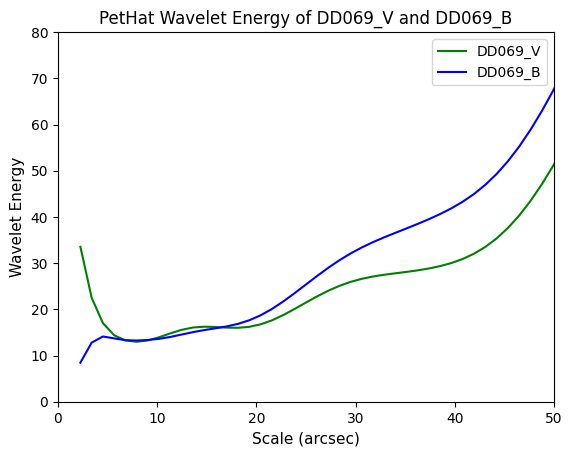

In [10]:
plt.plot(cube_V.scales*cube_V.unit_conv(unit),energy_V,label=cube_V.name,color='green')
plt.plot(cube_B.scales*cube_B.unit_conv(unit),energy_B,label=cube_B.name,color='blue')
plt.xlabel(r'Scale ('+unit+')', fontsize=11)
plt.ylabel(r'Wavelet Energy', fontsize=11)
plt.xlim(0,50)
plt.ylim(0,80)
plt.legend()
plt.title('PetHat Wavelet Energy of '+cube_V.name+' and '+cube_B.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_V.name+'_and_'+cube_B.name+'.png', dpi=300)
plt.show()


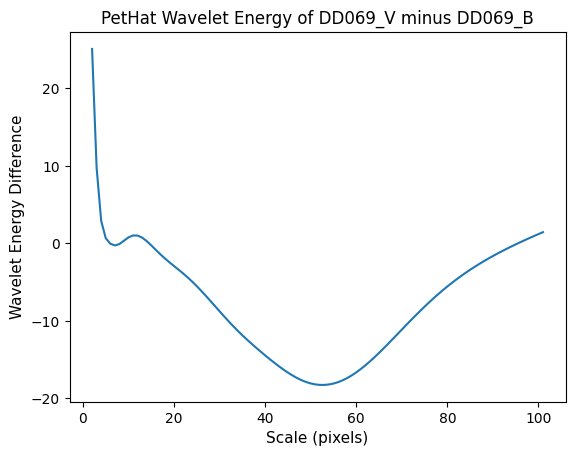

In [6]:
plt.plot(cube_V.scales,energy_V-energy_B)
plt.xlabel(r'Scale (pixels)', fontsize=11)
plt.ylabel(r'Wavelet Energy Difference', fontsize=11)
plt.title('PetHat Wavelet Energy of '+cube_V.name+' minus '+cube_B.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_V.name+'_minus_'+cube_B.name+'.png', dpi=300)
plt.show()

In [3]:
cube_V_sp = pethat_wavelet_scale_analysis('DD069_V', 'starless_backgroundless_d69_V.fit', [[300,700],[200,600]], scales_in = [5,20,40,60,80], scales_type="array", pixel_scale=1.134, distance=800000)

Commencing the wavelet scale analysis of DD069_V
|████████████████████████████████████████| 5/5 [100%] in 4.6s (1.08/s) 
Wavelet scale analysis of DD069_V has finished.


<Figure size 640x480 with 0 Axes>

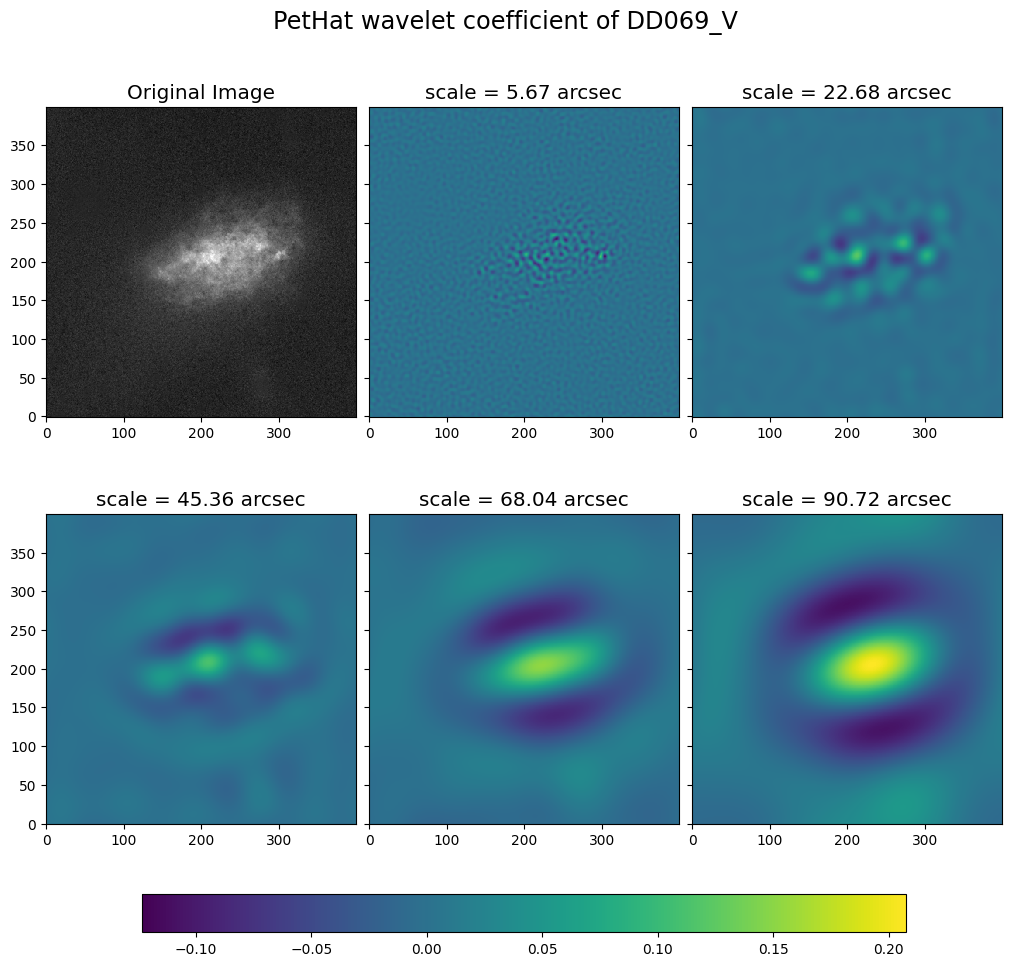

In [4]:
unit = 'arcsec'
fig = plt.figure(layout='constrained', figsize=(10, 9.5))
subfigs = fig.subfigures(1, 1, wspace=0.07)
our_data = np.append(np.real(cube_V_sp.cube),[np.real(cube_V_sp.original)],axis=0)
axes = subfigs.subplots(2, 3, sharey=True)
ax = axes[0][0]
im = ax.imshow(our_data[5], origin='lower', interpolation='nearest', cmap='gray', vmin=0, vmax=1)
ax.set_title('Original Image', fontsize='x-large')
for i in range(len(cube_V_sp.scales)):
    ax = axes[(i+1)//3][(i+1)%3]
    im = ax.imshow(our_data[i], origin='lower', interpolation='nearest', vmin=np.min(np.real(cube_V_sp.cube)), vmax=np.max(np.real(cube_V_sp.cube)))
    ax.set_title('scale = '+str(np.round(cube_V_sp.scales[i]*cube_V_sp.unit_conv(unit),3))+' '+ unit, fontsize='x-large')

fig.colorbar(im, shrink=0.8, ax=axes, location='bottom')

fig.suptitle('PetHat wavelet coefficient of '+cube_V_sp.name, fontsize='xx-large')

plt.show()

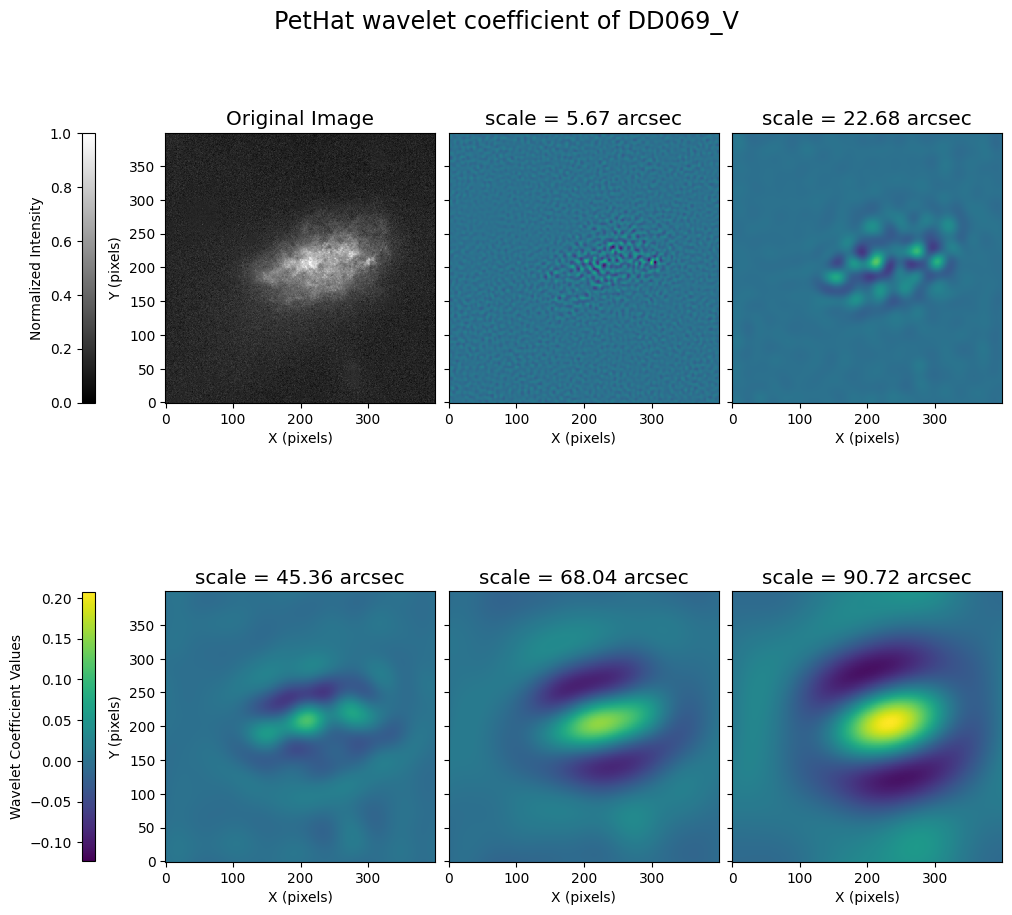

In [21]:
unit = 'arcsec'
fig = plt.figure(layout='constrained', figsize=(10, 9.5))
subfigs = fig.subfigures(1, 1, wspace=0.07)
our_data = np.append(np.real(cube_V_sp.cube),[np.real(cube_V_sp.original)],axis=0)
axes = subfigs.subplots(2, 3, sharey=True)
ax = axes[0][0]
im = ax.imshow(our_data[5], origin='lower', interpolation='nearest', cmap='gray', vmin=0, vmax=1)
cb = fig.colorbar(im, shrink=0.6, ax=ax, location='left')
ax.set_title('Original Image', fontsize='x-large')
ax.set_xlabel("X (pixels)")
ax.set_ylabel("Y (pixels)")
cb.set_label('Normalized Intensity')
for i in range(len(cube_V_sp.scales)):
    ax = axes[(i+1)//3][(i+1)%3]
    im = ax.imshow(our_data[i], origin='lower', interpolation='nearest', vmin=np.min(np.real(cube_V_sp.cube)), vmax=np.max(np.real(cube_V_sp.cube)))
    ax.set_title('scale = '+str(np.round(cube_V_sp.scales[i]*cube_V_sp.unit_conv(unit),3))+' '+ unit, fontsize='x-large')
    ax.set_xlabel("X (pixels)")
    if i==2:
        cb = fig.colorbar(im, shrink=0.6, ax=ax, location='left')
        cb.set_label('Wavelet Coefficient Values')
        ax.set_ylabel("Y (pixels)")


fig.suptitle('PetHat wavelet coefficient of '+cube_V_sp.name, fontsize='xx-large')

plt.show()

In [4]:
names=['DD069_V','DD069_B']
paths=['starless_backgroundless_d69_V.fit','starless_backgroundless_d69_B.fit']
scales=[[4,20,1],[5,16,1]]
scale_types=["triplet","triplet"]
pixel_scales=[1.134,1.134]
color=['green','blue']
distance=800000
crop = [[[300,700],[200,600]],[[300,700],[200,600]]]

Commencing the wavelet scale analysis of DD069_V
|████████████████████████████████████████| 20/20 [100%] in 33.5s (0.60/s) 
Wavelet scale analysis of DD069_V has finished.
Commencing the wavelet scale analysis of DD069_B
|████████████████████████████████████████| 16/16 [100%] in 26.9s (0.60/s) 
Wavelet scale analysis of DD069_B has finished.


<Figure size 640x480 with 0 Axes>

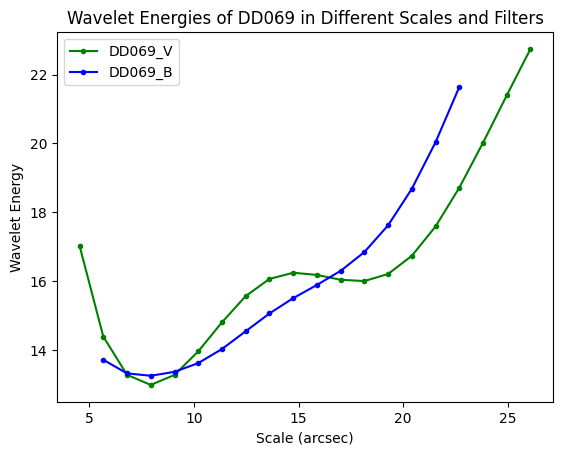

In [5]:
data_batch_energy_plot(paths,names,scales,pixel_scales,distance,scale_types,crop,'arcsec',colors=color)